In [1]:
import math, json, collections, itertools

In [2]:
import numpy as np
import matplotlib.pyplot as pp 
%matplotlib inline

In [3]:
from mpl_toolkits.basemap import Basemap
import geopy

# **Mastering Python Loops**

In [4]:
fibSequence = 1,1,2,3,5,8,13,21,34,65

In [5]:
print(fibSequence)

(1, 1, 2, 3, 5, 8, 13, 21, 34, 65)


In [6]:
for index in fibSequence:
    print(index)

1
1
2
3
5
8
13
21
34
65


## Iterators
Objects that define the method __next__()


In [16]:
%cd /Users/justinreid/PythonScripts/PythonResources/EffcientPython/chapter2/02_03// 

/Users/justinreid/PythonScripts/PythonResources/EffcientPython/chapter2/02_03


In [17]:
for game in open('games.txt', 'r'):
    print (game, end= '')

Athens (1896)
Paris (1900)
St Louis (1904)
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles (1932)
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne / Stockholm (1956)
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles (1984)
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


In [26]:
cities, years = [] , []

for game in open('games.txt', 'r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')
    
    cities.append(city)
    years.append(year)

In [32]:
geolocator = geopy.geocoders.Nominatim()

locations = {}
for city in cities:
    print("Locating",city)
    locations[city] = geolocator.geocode(city.split('/')[0])

/Users/justinreid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


Locating Athens
Locating Paris
Locating St Louis
Locating London
Locating Stockholm
Locating Antwerp
Locating Paris
Locating Amsterdam
Locating Los Angeles
Locating Berlin
Locating London
Locating Helsinki
Locating Melbourne / Stockholm
Locating Rome
Locating Tokyo
Locating Mexico
Locating Munich
Locating Montreal
Locating Moscow
Locating Los Angeles
Locating Seoul
Locating Barcelona
Locating Atlanta
Locating Sydney
Locating Athens
Locating Beijing
Locating London
Locating Rio


In [33]:
locations["Paris"]

Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0))

/Users/justinreid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/justinreid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


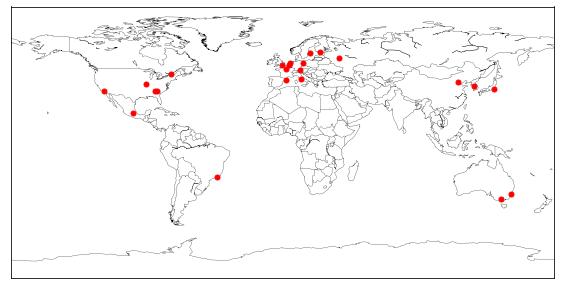

In [45]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for city,pos in locations.items():
    world.plot(pos.longitude,pos.latitude,'r.', markersize = 10, latlon=True)

In [46]:
locations

{'Athens': Location(Athens, Athens-Clarke County, Georgia, 303341458, United States, (33.9597677, -83.376398, 0.0)),
 'Paris': Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0)),
 'St Louis': Location(St. Louis, City of Saint Louis, Missouri, United States of America, (38.6268039, -90.1994097, 0.0)),
 'London': Location(London, Greater London, England, SW1A 2DX, United Kingdom, (51.5073219, -0.1276474, 0.0)),
 'Stockholm': Location(Stockholm, Stockholms kommun, Sveriges Landskap, Stockholms län, Svealand, 111 29, Sverige, (59.3251172, 18.0710935, 0.0)),
 'Antwerp': Location(Antwerpen, Vlaanderen, België - Belgique - Belgien, (51.2211097, 4.3997081, 0.0)),
 'Amsterdam': Location(Amsterdam, Noord-Holland, Nederland, (52.3745403, 4.89797550561798, 0.0)),
 'Los Angeles': Location(Los Angeles, Los Angeles County, California, United States of America, (34.0536909, -118.2427666, 0.0)),
 'Berlin': Location(Berlin, 10117, Deutschland, (52.5170365, 13.388

In [47]:
locations['Athens'] = geolocator.geocode('Athens', 'Greece')

/Users/justinreid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/justinreid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


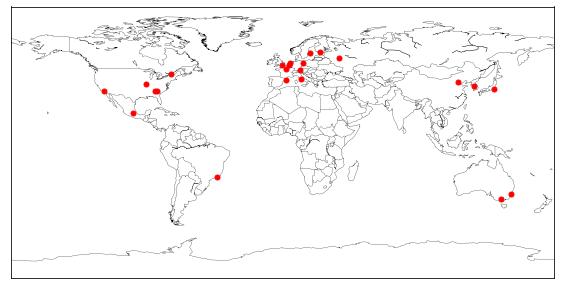

In [48]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for city,pos in locations.items():
    world.plot(pos.longitude,pos.latitude,'r.', markersize = 10, latlon=True)


In [49]:
for index,city in enumerate(cities[:10]):
    print(index,city)

0 Athens
1 Paris
2 St Louis
3 London
4 Stockholm
5 Antwerp
6 Paris
7 Amsterdam
8 Los Angeles
9 Berlin


In [50]:
for city in sorted(cities[:10]):
    print(city)

Amsterdam
Antwerp
Athens
Berlin
London
Los Angeles
Paris
Paris
St Louis
Stockholm


In [51]:
for city in sorted(cities[:10], key=len):
    print(city)

Paris
Paris
Athens
London
Berlin
Antwerp
St Louis
Stockholm
Amsterdam
Los Angeles


In [53]:
for i, city in enumerate(reversed(cities[:10])):
    print(i,city)

0 Berlin
1 Los Angeles
2 Amsterdam
3 Paris
4 Antwerp
5 Stockholm
6 London
7 St Louis
8 Paris
9 Athens
